In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
cptfer = pd.read_csv("CPTFER.txt", delimiter=";")

In [29]:
cptfer.head(-10)

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00
...,...,...,...,...,...,...
83260,27,14,21111,9262162,28/11/2018 00:00:00,20/4/2024 00:00:00
83261,27,35,21111,9262227,13/6/2011 00:00:00,20/4/2024 00:00:00
83262,78,39,21111,9262552,19/6/2018 00:00:00,20/4/2024 00:00:00
83263,27,25,21111,9262590,28/8/2008 00:00:00,20/4/2024 00:00:00


In [30]:
cptfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83275 entries, 0 to 83274
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BANQUE           83275 non-null  int64 
 1   AGENCE           83275 non-null  int64 
 2   GENERIQUE        83275 non-null  int64 
 3   RADICAL          83275 non-null  int64 
 4   DATE_DEMANDE     81388 non-null  object
 5   DATE_TRAITEMENT  83275 non-null  object
dtypes: int64(4), object(2)
memory usage: 3.8+ MB


In [31]:
cptfer['BANQUE'].value_counts()

BANQUE
81    12562
78    11426
45     8885
1      8718
27     6735
57     6613
64     6307
48     4931
17     4676
50     3520
79     3055
82     1637
43     1548
46     1285
77      756
83      339
28       86
65       76
2        60
80       27
51       16
58        7
30        5
32        2
33        2
90        1
Name: count, dtype: int64

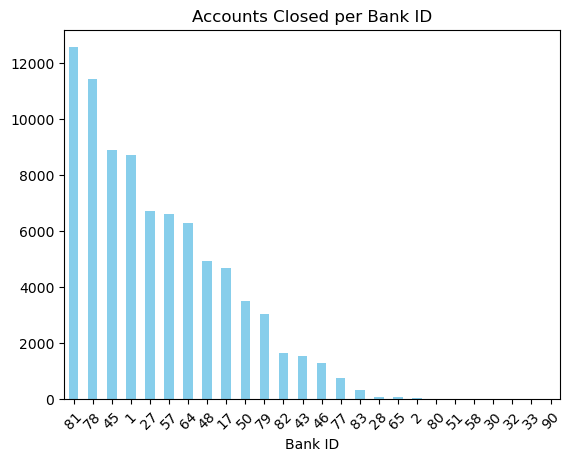

In [32]:
closed_count = cptfer['BANQUE'].value_counts()
closed_count.plot(kind='bar', color='skyblue')
plt.xlabel('Bank ID')
#plt.ylabel('Accounts Closed')
plt.title('Accounts Closed per Bank ID')
plt.xticks(rotation=45)
plt.show()

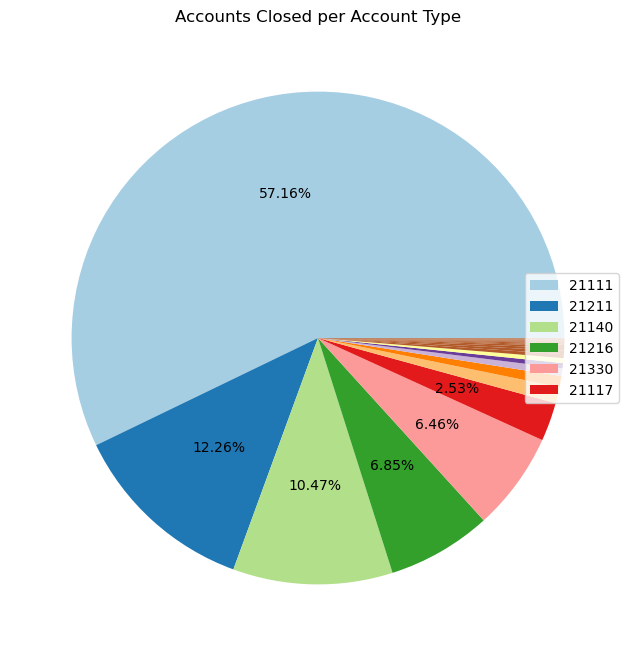

In [33]:
def autopct(pct): # only show the label when it's > 2%
    return ('%.2f%%' % pct) if pct > 2 else ''

my_labels = ('21111', '21211', '21140', '21216', '21330', '21117')
closed_generic = cptfer['GENERIQUE'].value_counts()
closed_generic.plot(kind='pie', figsize=(12,8), autopct=autopct, colors=plt.cm.Paired(range(len(closed_generic))), labels=None, ylabel='')
plt.title('Accounts Closed per Account Type')
plt.legend(loc=5, labels=my_labels)

In [34]:
cptfer['DATE_DEMANDE'] = pd.to_datetime(cptfer['DATE_DEMANDE'], dayfirst=True)

In [35]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT
0,64,24,21211,9216056,2008-01-18,20/4/2024 00:00:00
1,1,26,21111,9216094,2011-06-24,20/4/2024 00:00:00
2,78,25,21111,9216117,2016-04-27,20/4/2024 00:00:00
3,78,66,21211,9216229,2017-02-08,20/4/2024 00:00:00
4,81,5,21111,9216395,2008-10-13,20/4/2024 00:00:00


In [36]:
cptfer['Month'] = cptfer['DATE_DEMANDE'].dt.month
cptfer['Quarter'] = cptfer['DATE_DEMANDE'].dt.to_period('Q')
cptfer['Year'] = cptfer['DATE_DEMANDE'].dt.year

In [37]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,Month,Quarter,Year
0,64,24,21211,9216056,2008-01-18,20/4/2024 00:00:00,1.0,2008Q1,2008.0
1,1,26,21111,9216094,2011-06-24,20/4/2024 00:00:00,6.0,2011Q2,2011.0
2,78,25,21111,9216117,2016-04-27,20/4/2024 00:00:00,4.0,2016Q2,2016.0
3,78,66,21211,9216229,2017-02-08,20/4/2024 00:00:00,2.0,2017Q1,2017.0
4,81,5,21111,9216395,2008-10-13,20/4/2024 00:00:00,10.0,2008Q4,2008.0


In [38]:
median_year = cptfer['Year'].median()
cptfer['Year'] = cptfer['Year'].fillna(median_year)

In [39]:
#cptfer['Month'] = cptfer['Month'].astype(str).str.slice(start=5)
cptfer['Quarter'] = cptfer['Quarter'].astype(str).str.slice(start=4)

In [40]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,Month,Quarter,Year
0,64,24,21211,9216056,2008-01-18,20/4/2024 00:00:00,1.0,Q1,2008.0
1,1,26,21111,9216094,2011-06-24,20/4/2024 00:00:00,6.0,Q2,2011.0
2,78,25,21111,9216117,2016-04-27,20/4/2024 00:00:00,4.0,Q2,2016.0
3,78,66,21211,9216229,2017-02-08,20/4/2024 00:00:00,2.0,Q1,2017.0
4,81,5,21111,9216395,2008-10-13,20/4/2024 00:00:00,10.0,Q4,2008.0


In [41]:
cptfer['Year'] = cptfer['Year'].astype(str).str.replace('\.0', '', regex=True)

In [42]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,Month,Quarter,Year
0,64,24,21211,9216056,2008-01-18,20/4/2024 00:00:00,1.0,Q1,2008
1,1,26,21111,9216094,2011-06-24,20/4/2024 00:00:00,6.0,Q2,2011
2,78,25,21111,9216117,2016-04-27,20/4/2024 00:00:00,4.0,Q2,2016
3,78,66,21211,9216229,2017-02-08,20/4/2024 00:00:00,2.0,Q1,2017
4,81,5,21111,9216395,2008-10-13,20/4/2024 00:00:00,10.0,Q4,2008


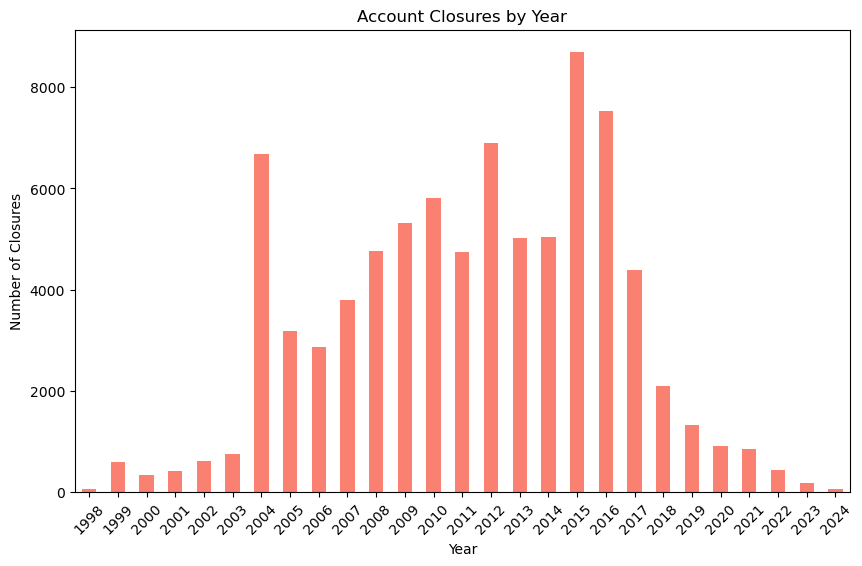

In [43]:
yearly_counts = cptfer['Year'].value_counts().sort_index()
year_ticks = yearly_counts.index[yearly_counts.index.astype(float) % 5 == 0]

plt.figure(figsize=(10, 6))

yearly_counts.plot(kind='bar', color='salmon')
plt.title('Account Closures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)
plt.show()

In [45]:
median_month = cptfer['Month'].median()
cptfer['Month'] = cptfer['Month'].fillna(median_month)

In [46]:
cptfer['Month'] = cptfer['Month'].astype(int)

In [48]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,Month,Quarter,Year
0,64,24,21211,9216056,2008-01-18,20/4/2024 00:00:00,1,Q1,2008
1,1,26,21111,9216094,2011-06-24,20/4/2024 00:00:00,6,Q2,2011
2,78,25,21111,9216117,2016-04-27,20/4/2024 00:00:00,4,Q2,2016
3,78,66,21211,9216229,2017-02-08,20/4/2024 00:00:00,2,Q1,2017
4,81,5,21111,9216395,2008-10-13,20/4/2024 00:00:00,10,Q4,2008


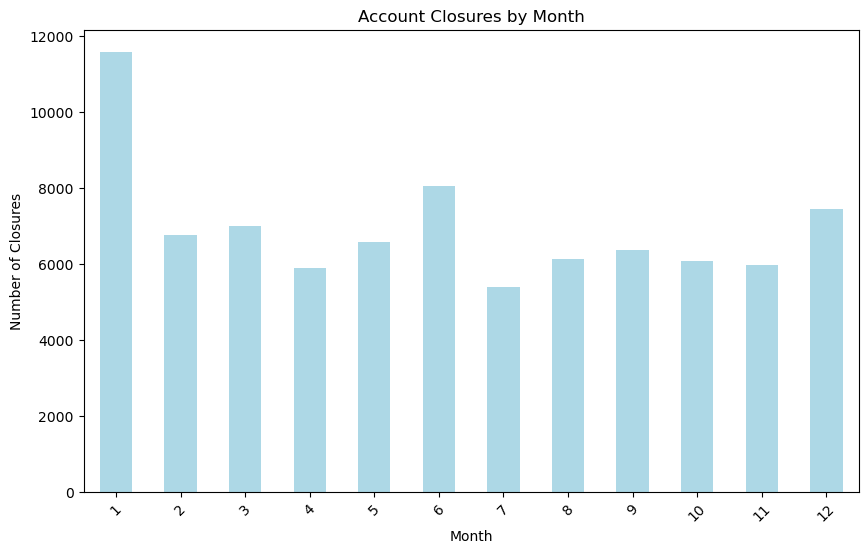

In [49]:
monthly_counts = cptfer['Month'].value_counts().sort_index()
#month_ticks = monthly_counts.index[monthly_counts.index.astype(float) % 5 == 0]

plt.figure(figsize=(10, 6))

monthly_counts.plot(kind='bar', color='lightblue')
plt.title('Account Closures by Month')
plt.xlabel('Month')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)
plt.show()